#  PREDICTING THE GROWTH AND TREND OF COVID-19 PANDEMIC USING MACHINE LEARNING

This project is based on the paper https://www.sciencedirect.com/science/article/pii/S254266052030055X that uses the following mathematical model to approximate certain dataset.
$$
f(x)=k \cdot \gamma \cdot \beta \cdot \alpha^{\beta} \cdot x^{-1-\beta} \cdot \exp \left(-\gamma\left(\frac{\alpha}{x}\right)^{\beta}\right)
$$
Here, $f(x)$ denotes the number of cases with $x$, where $x>0$ is the time in number of days from the first case, and $\alpha, \beta, \gamma>0, \in \mathbb{R}$ are parameters of the model. Now, we can find the appropriate values of the parameters $\alpha, \beta$ and $\gamma$ to minimize the error between the predicted cases $(y=f(x))$ and the actual cases $(\hat{y}) .$


Their  prediction model is available online at https://github.com/shreshthtuli/covid-19-prediction. The
dataset used for this work is the Our World Dataset, available at https://github.com/owid/covid-19-data/
tree/master/public/data/. 

In [36]:
import numpy as np
import sympy as sp
import math
import pandas as pd
from datetime import datetime
from scipy.optimize import least_squares
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
def fun(x,t,y):
    
    return x[3]*x[2]*x[1]*x[0]**x[1]*t**(-1-x[1])*np.exp(-x[2]*(x[0]/t)**x[1]) - y

def covid_f(x,t):
    return x[3]*x[2]*x[1]*x[0]**x[1]*t**(-1-x[1])*np.exp(-x[2]*(x[0]/t)**x[1])

Iso code:  ['BGD' 'COL' 'CRI' 'ETH' 'GHA' 'IDN' 'IND' 'KAZ' 'KEN' 'MEX' 'MMR' 'NPL'
 'PAK' 'PRY' 'SLV' 'TGO' 'THA' 'TUN' 'UGA' 'VNM' 'ZAF' 'ZWE']
Bangladesh
   level_0  index        date  total_cases  days
0        1      1  2020-03-18          8.0   1.0
1        2      2  2020-03-19         10.0   2.0
2        3      3  2020-03-20         10.0   3.0
3        4      4  2020-03-21         17.0   4.0
4        5      5  2020-03-22         24.0   5.0
a =  21.280779050574367 b =  0.8575342016465843 c =  19.962277133619438 k =  422.4756633237818 

Cost is:  0.00026653711793513666 



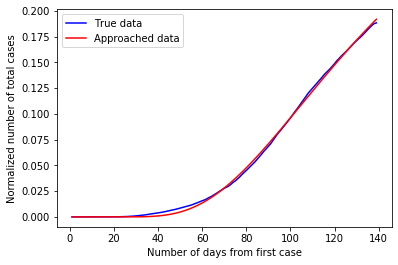

Colombia
   level_0  index        date  total_cases  days
0        1    141  2020-03-15         34.0   1.0
1        2    142  2020-03-16         45.0   2.0
2        3    143  2020-03-17         57.0   3.0
3        4    144  2020-03-18         65.0   4.0
4        5    145  2020-03-19        102.0   5.0
a =  19.474113505914755 b =  0.5633834947672094 c =  26.72618520734605 k =  54288.934384217166 

Cost is:  0.00225735489443596 



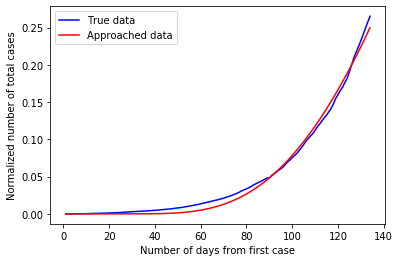

Costa Rica
   level_0  index        date  total_cases  days
0        1    276  2020-03-19         69.0   1.0
1        2    277  2020-03-20         87.0   2.0
2        3    278  2020-03-21        113.0   3.0
3        4    279  2020-03-22        117.0   4.0
4        5    280  2020-03-23        134.0   5.0
a =  23.53219572118048 b =  0.735274111804318 c =  34.062532476651974 k =  77512.23015748772 

Cost is:  0.00695514074087245 



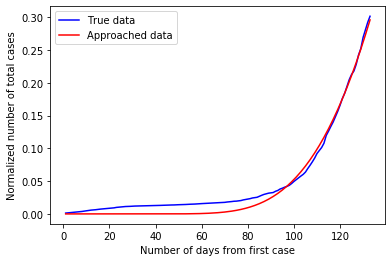

Ethiopia
   level_0  index        date  total_cases  days
0        1    410  2020-04-06         43.0   5.0
1        2    411  2020-04-07         44.0   6.0
2        3    412  2020-04-08         52.0   7.0
3        4    413  2020-04-09         55.0   8.0
4        5    414  2020-04-13         71.0  12.0
a =  639.6980939442647 b =  -5.148443555450292 c =  -6.491574107002605 k =  25015.162961741287 

Cost is:  0.0018409650216615243 



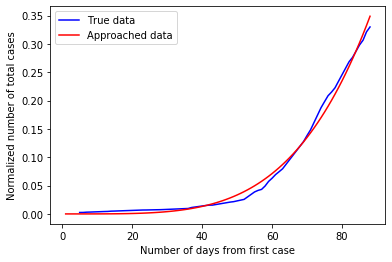

Ghana
   level_0  index        date  total_cases  days
0        1    458  2020-04-11        378.0   1.0
1        2    459  2020-04-15        636.0   5.0
2        3    460  2020-04-19        834.0   9.0
3        4    461  2020-04-28       1550.0  18.0
4        5    462  2020-05-02       2074.0  22.0
a =  7.638030024566205 b =  0.33853658644084744 c =  21.217272162498656 k =  40365.61874443325 

Cost is:  0.003204266963600537 



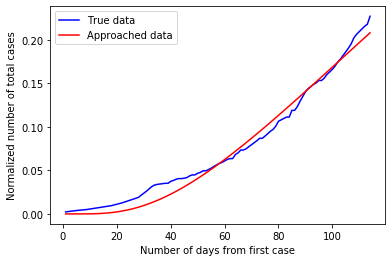

Indonesia
   level_0  index        date  total_cases  days
0        1    541  2020-03-24        579.0   1.0
1        2    542  2020-03-28       1046.0   5.0
2        3    543  2020-03-29       1155.0   6.0
3        4    544  2020-03-30       1285.0   7.0
4        5    545  2020-03-31       1414.0   8.0
a =  1098.9394411503085 b =  -2.5685868625463177 c =  -135.00456344036562 k =  14.060666432016655 

Cost is:  0.00016354792133420527 



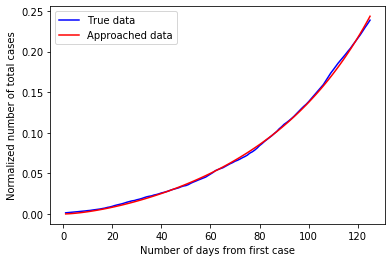

India
   level_0  index        date  total_cases  days
0        1    647  2020-03-21        231.0   1.0
1        2    648  2020-03-22        320.0   2.0
2        3    649  2020-03-23        439.0   3.0
3        4    650  2020-03-24        492.0   4.0
4        5    651  2020-03-25        562.0   5.0
a =  21.157129635655146 b =  0.4973428466130828 c =  21.91815863277169 k =  56143.63796556262 

Cost is:  0.0019209154378980909 



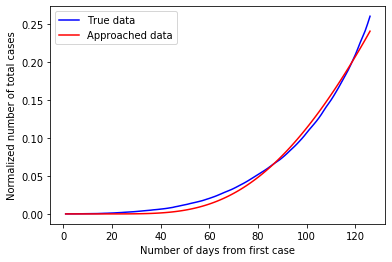

Kazakhstan
   level_0  index        date  total_cases  days
0        1    762  2020-03-23         60.0   1.0
1        2    763  2020-03-24         62.0   2.0
2        3    764  2020-03-25         79.0   3.0
3        4    765  2020-03-26         88.0   4.0
4        5    766  2020-03-27        120.0   5.0
a =  27.100282093046644 b =  0.5624735549944758 c =  21.04142807410201 k =  42783.38015363525 

Cost is:  0.00865774344241533 



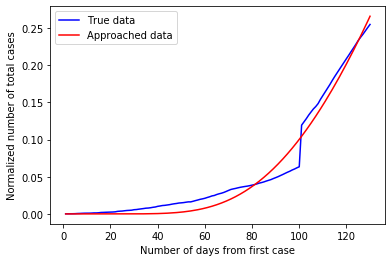

Kenya
   level_0  index        date  total_cases  days
0        1    888  2020-03-30         42.0   1.0
1        2    889  2020-03-31         50.0   2.0
2        3    890  2020-04-01         59.0   3.0
3        4    891  2020-04-02         81.0   4.0
4        5    892  2020-04-03        110.0   5.0
a =  21.80689541726147 b =  0.54275328972242 c =  23.21038432814061 k =  52370.754360826155 

Cost is:  0.003081433377432377 



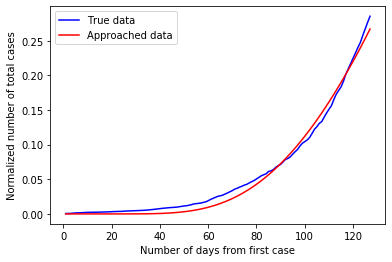

Mexico
   level_0  index        date  total_cases  days
0        1    996  2020-03-01          4.0   1.0
1        2    997  2020-03-02          5.0   2.0
2        3    998  2020-03-09          7.0   9.0
3        4    999  2020-03-12         11.0  12.0
4        5   1000  2020-03-13         16.0  13.0
a =  17.48419351382035 b =  0.46902217452670036 c =  23.6740375219491 k =  42817.7245938254 

Cost is:  2.9042059688647638e-05 



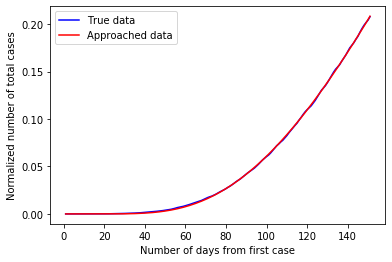

Myanmar
   level_0  index        date  total_cases  days
0        1   1140  2020-04-11         28.0   1.0
1        2   1141  2020-04-12         31.0   2.0
2        3   1142  2020-04-13         41.0   3.0
3        4   1143  2020-04-14         62.0   4.0
4        5   1144  2020-04-15         74.0   5.0
a =  4.003567001514001 b =  0.18094434725763445 c =  14.875883614963941 k =  33929.24313125105 

Cost is:  0.0032947634200059424 



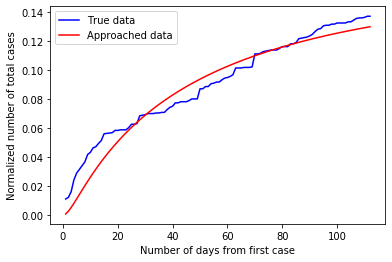

Nepal
   level_0  index        date  total_cases  days
0        1   1247  2020-03-25          3.0   1.0
1        2   1248  2020-03-26          3.0   2.0
2        3   1249  2020-03-27          3.0   3.0
3        4   1250  2020-03-28          3.0   4.0
4        5   1251  2020-03-29          5.0   5.0
a =  34.8231583433596 b =  2.4063566226692163 c =  32.22284607333097 k =  29.58680804156265 

Cost is:  0.0005619923939669189 



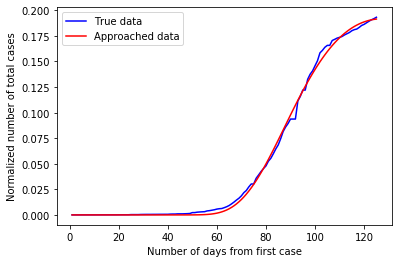

Pakistan
   level_0  index        date  total_cases  days
0        1   1373  2020-03-19        302.0   1.0
1        2   1374  2020-03-20        478.0   2.0
2        3   1375  2020-03-21        495.0   3.0
3        4   1376  2020-03-22        646.0   4.0
4        5   1377  2020-03-23        784.0   5.0
a =  21.418023460082054 b =  1.1313664023723287 c =  20.866387685394276 k =  105.43680018164746 

Cost is:  0.0014327991310123965 



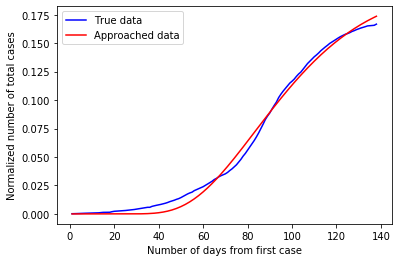

Paraguay
   level_0  index        date  total_cases  days
0        1   1508  2020-03-17          9.0   1.0
1        2   1509  2020-03-18         11.0   2.0
2        3   1510  2020-03-19         11.0   3.0
3        4   1511  2020-03-20         13.0   4.0
4        5   1512  2020-03-21         18.0   5.0
a =  20.739903603727456 b =  0.4193151907546903 c =  20.102749034797142 k =  69650.85031614163 

Cost is:  0.00879960783112581 



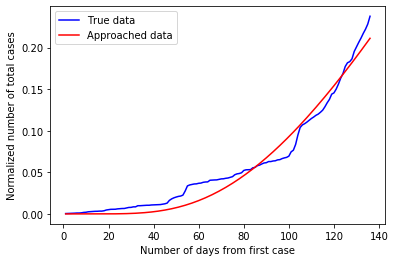

El Salvador
   level_0  index        date  total_cases  days
0        1   1645  2020-04-18        177.0   1.0
1        2   1646  2020-04-19        190.0   2.0
2        3   1647  2020-04-20        201.0   3.0
3        4   1648  2020-04-21        218.0   4.0
4        5   1649  2020-04-22        225.0   5.0
a =  12.832392650175025 b =  0.3574011594469975 c =  18.136170418440823 k =  49518.956598455276 

Cost is:  0.005301523688825507 



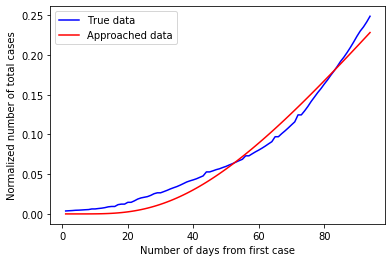

Togo
   level_0  index        date  total_cases  days
0        1   1740  2020-03-22         15.0   1.0
1        2   1741  2020-03-23         15.0   2.0
2        3   1742  2020-03-24         18.0   3.0
3        4   1743  2020-03-25         18.0   4.0
4        5   1744  2020-03-26         23.0   5.0
a =  14.249054738063606 b =  0.38745553459224286 c =  14.034926019535092 k =  3569.1122339231383 

Cost is:  0.0020634027934019845 



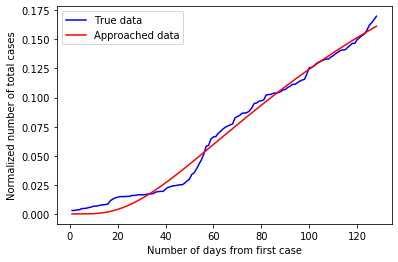

Thailand
   level_0  index        date  total_cases  days
0        1   1868  2020-03-12         70.0   1.0
1        2   1869  2020-03-16        114.0   5.0
2        3   1870  2020-03-19        177.0   8.0
3        4   1871  2020-03-20        212.0   9.0
4        5   1872  2020-03-21        366.0  10.0
a =  7.900143057371953 b =  0.35752101849086176 c =  9.195996191072707 k =  321.25940850724885 

Cost is:  0.000939852391235241 



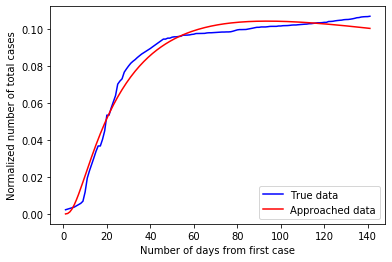

Tunisia
   level_0  index        date  total_cases  days
0        1   1988  2020-03-18         24.0   1.0
1        2   1989  2020-03-19         29.0   2.0
2        3   1990  2020-03-20         39.0   3.0
3        4   1991  2020-03-21         54.0   4.0
4        5   1992  2020-03-22         60.0   5.0
a =  8.6698866814517 b =  0.31208252691805005 c =  9.471844742297222 k =  672.3710287695905 

Cost is:  0.0009598710688339342 



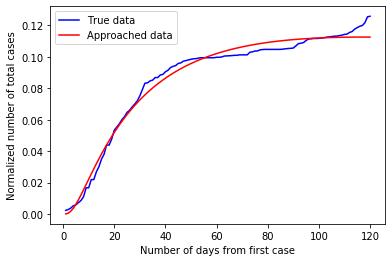

Uganda
   level_0  index        date  total_cases  days
0        1   2106  2020-04-09         53.0   1.0
1        2   2107  2020-04-10         53.0   2.0
2        3   2108  2020-04-12         53.0   4.0
3        4   2109  2020-04-13         54.0   5.0
4        5   2110  2020-04-14         54.0   6.0
a =  11.985817486328413 b =  1.392625383291747 c =  12.220867595055322 k =  18.257474265925207 

Cost is:  0.21326394995286713 



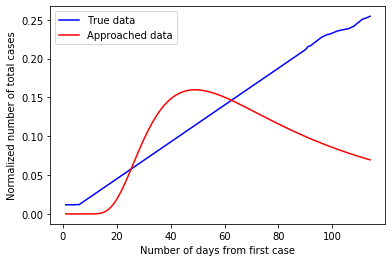

Vietnam
   level_0  index        date  total_cases  days
0        1   2130  2020-03-13         44.0   1.0
1        2   2131  2020-03-14         53.0   2.0
2        3   2132  2020-03-15         53.0   3.0
3        4   2133  2020-03-16         57.0   4.0
4        5   2134  2020-03-17         61.0   5.0
a =  555.7466788412918 b =  -1.5677827503437656 c =  -0.0071628328112963305 k =  73964.62450555558 

Cost is:  0.006641467044173895 



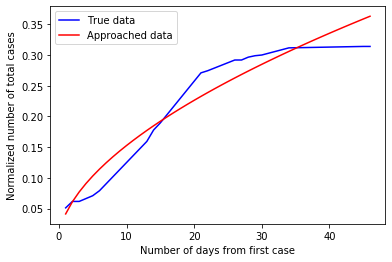

South Africa
   level_0  index        date  total_cases  days
0        1   2150  2020-03-14         24.0   1.0
1        2   2151  2020-03-15         24.0   2.0
2        3   2152  2020-03-16         51.0   3.0
3        4   2153  2020-03-17         62.0   4.0
4        5   2154  2020-03-18         85.0   5.0
a =  27.25145103980464 b =  0.675332752421392 c =  26.137522927187675 k =  37600.75778285809 

Cost is:  0.0008354629892199181 



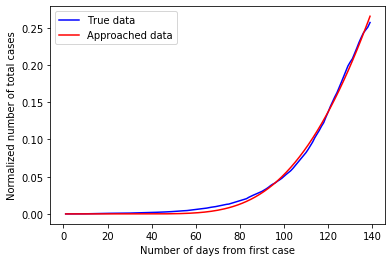

Zimbabwe
   level_0  index        date  total_cases  days
0        1   2286  2020-05-16         42.0   3.0
1        2   2287  2020-05-17         44.0   4.0
2        3   2288  2020-05-18         46.0   5.0
3        4   2289  2020-05-19         46.0   6.0
4        5   2290  2020-05-20         46.0   7.0
a =  891.066859687979 b =  -1.8242890375398237 c =  -178.24550198702244 k =  0.8652347810897232 

Cost is:  0.003346442432910457 



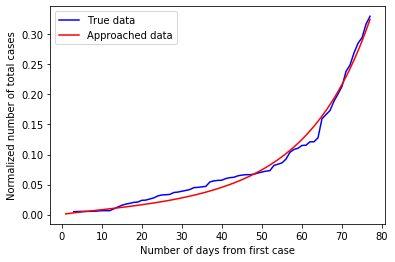

In [38]:
#Levenberg-Marquardt (LM)
#Read data for all countries 
data_all = pd.read_csv("covid-19-prediction-master/owid-covid-data.csv")

#Drop NaN values and reset index
data_all = data_all.dropna()
data_all = data_all.reset_index()

#Get all unique iso codes to apply the model for each country
iso = data_all.iso_code.unique()
print("Iso code: ", iso)

for i in iso:
    data = data_all[data_all.iso_code == i]    
    data = data[['date', 'total_cases']]
    
    data = data[data.total_cases != 0]
    data = data.sort_values(by='date',  ascending=True)
    data = data.reset_index()
    
    date_format = "%Y-%m-%d"
    a = datetime.strptime(data.iloc[0]['date'], date_format)
    n = data.shape[0]
    
    #Compute the days passed from the first date that the first case occured
    for j in range(1, n):
        b = datetime.strptime(data.iloc[j]['date'], date_format)
        delta = b - a
        data.at[j, 'days'] = delta.days

    data = data.drop([0])
    data = data.reset_index()
    
    print(data_all[data_all.iso_code == i].location.iloc[0])
    print(data.head())
    
    t_train = data['days'].values
    y_train = data['total_cases'].values
    #normalize y_train
    norm = np.linalg.norm(y_train)
    normal_array = y_train/norm
    
    x0 = np.array([3.5,1.0,5.0,1.0])
    res_lsq = least_squares(fun, x0, args = (t_train,normal_array),method='lm')
    
    print("a = ", res_lsq.x[0], "b = ", res_lsq.x[1] , "c = ", res_lsq.x[2], "k = ", res_lsq.x[3], "\n")
    print("Cost is: ", res_lsq.cost, "\n")
    x_appr = np.linspace(1,int(max(t_train)),int(max(t_train)))
    y_appr = covid_f(res_lsq.x, x_appr)
    
    plt.figure()
    plt.plot(t_train, normal_array,"b-",label = "True data")
    plt.plot(x_appr, y_appr,"r-", label = "Approached data")
    plt.xlabel('Number of days from first case')
    plt.ylabel('Normalized number of total cases')
    plt.legend()
    plt.show()

In [42]:
# import cvxpy as cp
# import numpy as np

# # Define and solve the CVXPY problem.
# x = cp.Variable(n)
# a = cp.Variable(1)
# b = cp.Variable(1)
# c = cp.Variable(1)
# d = cp.Variable(1)
# constraints = [x > 0,a > 0,b > 0,c > 0,d > 0]

# cost = cp.sum_squares(d*c*b*cp.power(a,b)*cp.power(x,(-1-b))*exp(-c*cp.power((a/x),b)) - y)
# prob = cp.Problem(cp.Minimize(cost))
# prob.solve()

# # Print result.
# print("\nThe optimal value is", prob.value)
# print("The optimal x is")
# print(x.value)
# print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)